In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv('/kaggle/input/hr-analytics-prediction/HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000
mean,36.924,802.486,9.193,2.913,1.000,1024.865,2.722,65.891,2.730,2.064,2.729,6502.931,14313.103,2.693,15.210,3.154,2.712,80.000,0.794,11.280,2.799,2.761,7.008,4.229,2.188,4.123
std,9.135,403.509,8.107,1.024,0.000,602.024,1.093,20.329,0.712,1.107,1.103,4707.957,7117.786,2.498,3.660,0.361,1.081,0.000,0.852,7.781,1.289,0.706,6.127,3.623,3.222,3.568
min,18.000,102.000,1.000,1.000,1.000,1.000,1.000,30.000,1.000,1.000,1.000,1009.000,2094.000,0.000,11.000,3.000,1.000,80.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
25%,30.000,465.000,2.000,2.000,1.000,491.250,2.000,48.000,2.000,1.000,2.000,2911.000,8047.000,1.000,12.000,3.000,2.000,80.000,0.000,6.000,2.000,2.000,3.000,2.000,0.000,2.000
50%,36.000,802.000,7.000,3.000,1.000,1020.500,3.000,66.000,3.000,2.000,3.000,4919.000,14235.500,2.000,14.000,3.000,3.000,80.000,1.000,10.000,3.000,3.000,5.000,3.000,1.000,3.000
75%,43.000,1157.000,14.000,4.000,1.000,1555.750,4.000,83.750,3.000,3.000,4.000,8379.000,20461.500,4.000,18.000,3.000,4.000,80.000,1.000,15.000,3.000,3.000,9.000,7.000,3.000,7.000
max,60.000,1499.000,29.000,5.000,1.000,2068.000,4.000,100.000,4.000,5.000,4.000,19999.000,26999.000,9.000,25.000,4.000,4.000,80.000,3.000,40.000,6.000,4.000,40.000,18.000,15.000,17.000


In [6]:
df.drop_duplicates()
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
# snake_case olarak sutun isimlerini degistirmek isterseniz asagidaki kodu kullanabilirsiniz.
# If you want to change the column names to snake_case, you can use the following code.
#import re
#data.columns = [re.sub(r'(?<=[a-z])([A-Z])', r'_\1',i).lower() for i in data.columns]

In [8]:
df_new = df[['Age',
             'OverTime',
             'MaritalStatus',
             'JobRole',
             'Gender',
             'EducationField',
             'Department',
             'BusinessTravel',
             'Education',
             'DistanceFromHome',
             'DailyRate',
             'Attrition']]

In [9]:
df_new.head()

,Age,OverTime,MaritalStatus,JobRole,Gender,EducationField,Department,BusinessTravel,Education,DistanceFromHome,DailyRate,Attrition
0,41,Yes,Single,Sales Executive,Female,Life Sciences,Sales,Travel_Rarely,2,1,1102,Yes
1,49,No,Married,Research Scientist,Male,Life Sciences,Research & Development,Travel_Frequently,1,8,279,No
2,37,Yes,Single,Laboratory Technician,Male,Other,Research & Development,Travel_Rarely,2,2,1373,Yes
3,33,Yes,Married,Research Scientist,Female,Life Sciences,Research & Development,Travel_Frequently,4,3,1392,No
4,27,No,Married,Laboratory Technician,Male,Medical,Research & Development,Travel_Rarely,1,2,591,No


In [10]:
df_new.isnull().sum()

Age                 0
OverTime            0
MaritalStatus       0
JobRole             0
Gender              0
EducationField      0
Department          0
BusinessTravel      0
Education           0
DistanceFromHome    0
DailyRate           0
Attrition           0
dtype: int64

In [11]:
# KPI olarak ilk Sales biriminde MArketing yapanlari # Sales biriminde MArketing yapanlari
kpi1 = df_new[(df_new['Department'] == 'Sales') & (df_new['EducationField'] == 'Marketing')]
kpi1.head(10)

,Age,OverTime,MaritalStatus,JobRole,Gender,EducationField,Department,BusinessTravel,Education,DistanceFromHome,DailyRate,Attrition
27,42,No,Married,Sales Executive,Male,Marketing,Sales,Travel_Rarely,4,8,691,No
29,46,No,Single,Manager,Female,Marketing,Sales,Travel_Rarely,4,2,705,No
36,50,Yes,Married,Sales Representative,Male,Marketing,Sales,Travel_Rarely,2,3,869,Yes
37,35,No,Married,Sales Representative,Female,Marketing,Sales,Travel_Rarely,3,2,890,No
46,34,No,Single,Sales Executive,Male,Marketing,Sales,Non-Travel,4,23,1065,No
48,46,Yes,Single,Sales Executive,Male,Marketing,Sales,Travel_Frequently,4,5,1211,No
52,44,Yes,Divorced,Sales Executive,Female,Marketing,Sales,Travel_Rarely,5,1,1488,No
54,26,Yes,Married,Sales Executive,Female,Marketing,Sales,Travel_Rarely,3,23,1443,No
76,35,No,Single,Sales Executive,Male,Marketing,Sales,Travel_Rarely,4,1,776,No
91,51,Yes,Single,Sales Executive,Male,Marketing,Sales,Travel_Rarely,4,21,632,No


In [12]:
kpi1.head()

,Age,OverTime,MaritalStatus,JobRole,Gender,EducationField,Department,BusinessTravel,Education,DistanceFromHome,DailyRate,Attrition
27,42,No,Married,Sales Executive,Male,Marketing,Sales,Travel_Rarely,4,8,691,No
29,46,No,Single,Manager,Female,Marketing,Sales,Travel_Rarely,4,2,705,No
36,50,Yes,Married,Sales Representative,Male,Marketing,Sales,Travel_Rarely,2,3,869,Yes
37,35,No,Married,Sales Representative,Female,Marketing,Sales,Travel_Rarely,3,2,890,No
46,34,No,Single,Sales Executive,Male,Marketing,Sales,Non-Travel,4,23,1065,No


In [13]:
# KPI2 

df_new['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [14]:
df_new.groupby('BusinessTravel')['DailyRate'].mean()

BusinessTravel
Non-Travel          816.960
Travel_Frequently   792.628
Travel_Rarely       803.022
Name: DailyRate, dtype: float64

In [15]:
# KPI3

kpi3 = df_new.groupby('Department')['OverTime'].count()
kpi3.head()

Department
Human Resources            63
Research & Development    961
Sales                     446
Name: OverTime, dtype: int64

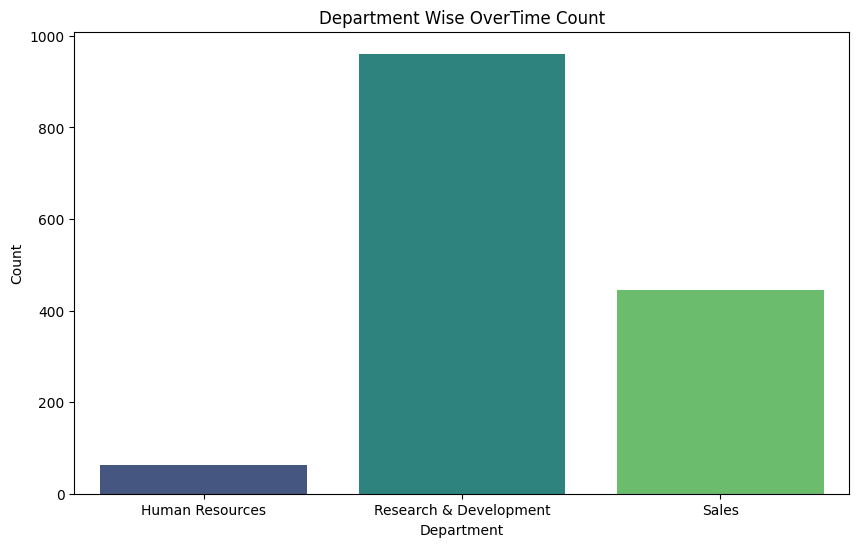

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x=kpi3.index, y=kpi3.values, palette ='viridis')
plt.title('Department Wise OverTime Count')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

In [17]:
JobRole_count = df_new['JobRole'].value_counts()

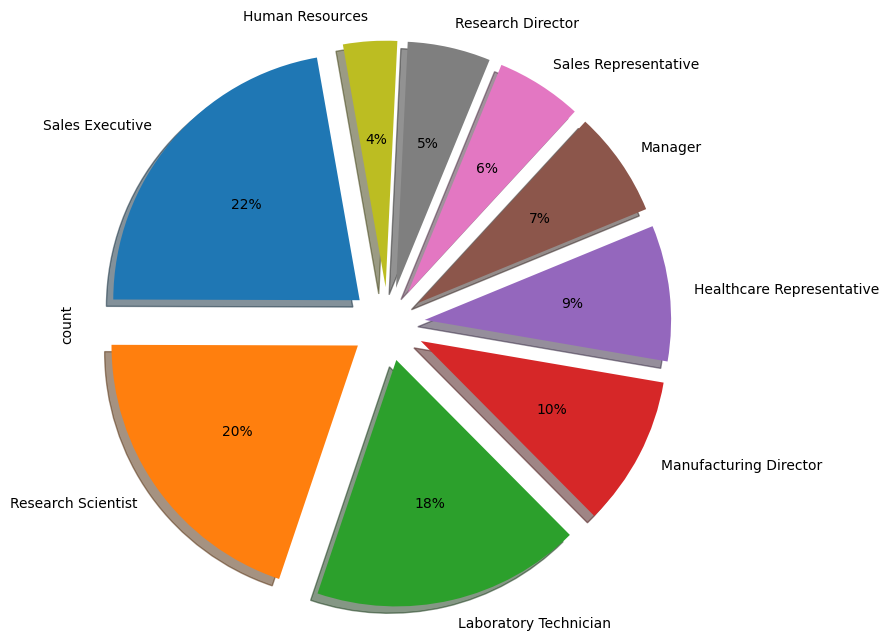

In [18]:
plt.figure(figsize = (12,8))
JobRole_count.plot(kind = 'pie',
                   autopct = '%1.0f%%',
                   explode = [0.15]*len(JobRole_count),
                  shadow = True,
                  startangle=100)
plt.show();

In [19]:
sales_female = df_new[(df_new['JobRole'] =='Manager') & (df_new['Gender'] == 'Female')]
sales_female.head()

,Age,OverTime,MaritalStatus,JobRole,Gender,EducationField,Department,BusinessTravel,Education,DistanceFromHome,DailyRate,Attrition
18,53,No,Married,Manager,Female,Life Sciences,Sales,Travel_Rarely,4,2,1219,No
25,53,No,Divorced,Manager,Female,Other,Research & Development,Travel_Rarely,3,5,1282,No
29,46,No,Single,Manager,Female,Marketing,Sales,Travel_Rarely,4,2,705,No
65,55,Yes,Divorced,Manager,Female,Medical,Research & Development,Travel_Rarely,3,8,836,No
105,59,No,Married,Manager,Female,Human Resources,Human Resources,Non-Travel,4,2,1420,No


In [20]:
female  = df_new[df_new['Gender']=='Female']
female.head()

,Age,OverTime,MaritalStatus,JobRole,Gender,EducationField,Department,BusinessTravel,Education,DistanceFromHome,DailyRate,Attrition
0,41,Yes,Single,Sales Executive,Female,Life Sciences,Sales,Travel_Rarely,2,1,1102,Yes
3,33,Yes,Married,Research Scientist,Female,Life Sciences,Research & Development,Travel_Frequently,4,3,1392,No
6,59,Yes,Married,Laboratory Technician,Female,Medical,Research & Development,Travel_Rarely,3,3,1324,No
11,29,Yes,Single,Laboratory Technician,Female,Life Sciences,Research & Development,Travel_Rarely,2,15,153,No
15,29,No,Divorced,Manufacturing Director,Female,Life Sciences,Research & Development,Travel_Rarely,4,21,1389,No


In [21]:
#KPI4

female_unmarried = female[female['MaritalStatus']!='Married']
female_unmarried.head()

,Age,OverTime,MaritalStatus,JobRole,Gender,EducationField,Department,BusinessTravel,Education,DistanceFromHome,DailyRate,Attrition
0,41,Yes,Single,Sales Executive,Female,Life Sciences,Sales,Travel_Rarely,2,1,1102,Yes
11,29,Yes,Single,Laboratory Technician,Female,Life Sciences,Research & Development,Travel_Rarely,2,15,153,No
15,29,No,Divorced,Manufacturing Director,Female,Life Sciences,Research & Development,Travel_Rarely,4,21,1389,No
20,24,No,Divorced,Manufacturing Director,Female,Other,Research & Development,Non-Travel,2,11,673,No
22,34,No,Single,Research Director,Female,Life Sciences,Research & Development,Travel_Rarely,4,7,419,No


In [22]:
kpi4 = female_unmarried['Department'].value_counts()
kpi4

Department
Research & Development    212
Sales                      95
Human Resources             9
Name: count, dtype: int64

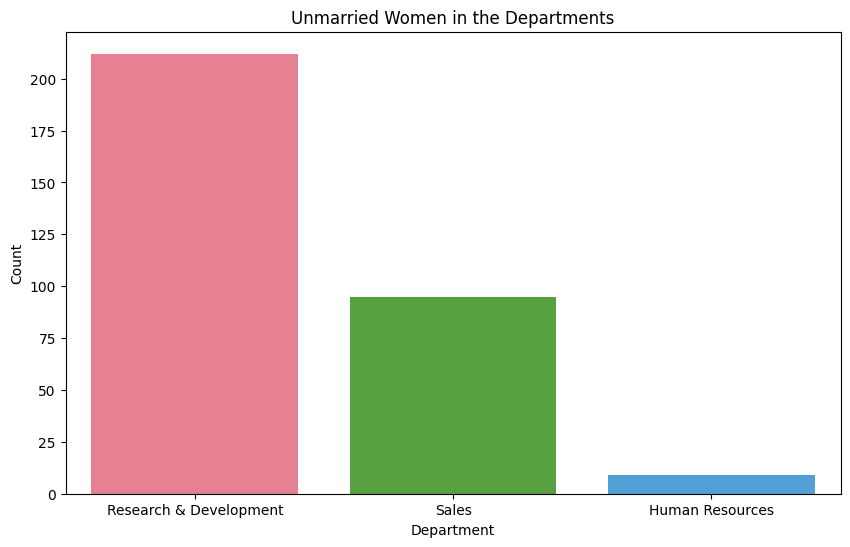

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x=kpi4.index, y=kpi4.values, palette ='husl')
plt.title('Unmarried Women in the Departments')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show();

In [24]:
kpi5 = female_unmarried['EducationField'].value_counts()
kpi5

EducationField
Life Sciences       132
Medical             108
Marketing            31
Technical Degree     30
Other                12
Human Resources       3
Name: count, dtype: int64

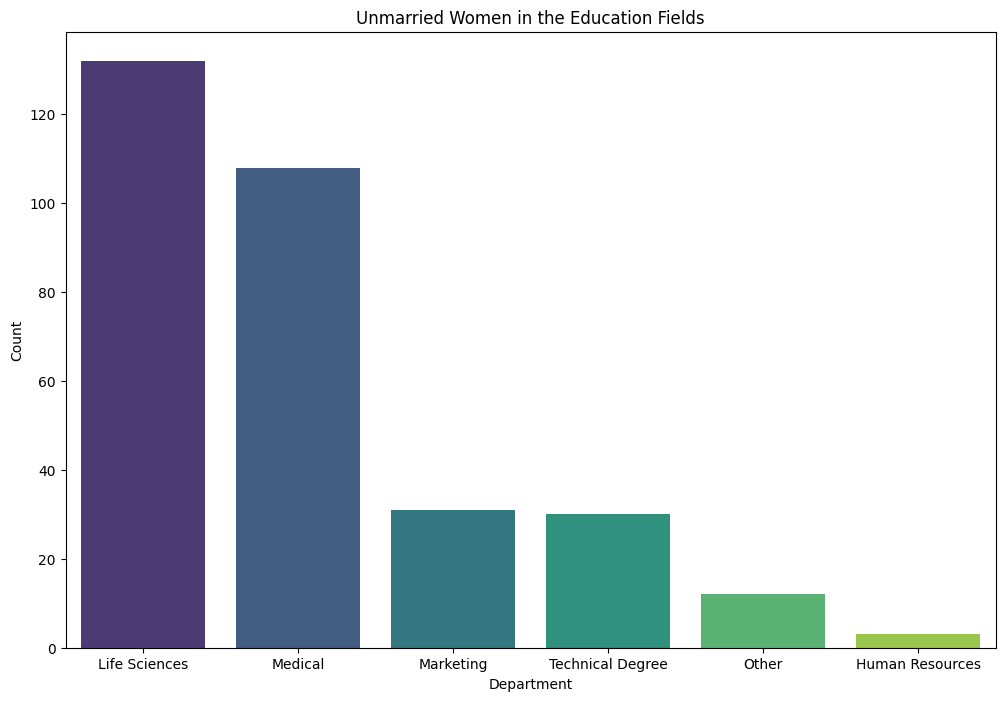

In [25]:
plt.figure(figsize = (12,8))
sns.barplot(x=kpi5.index, y= kpi5.values, palette = 'viridis')
plt.title('Unmarried Women in the Education Fields')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show();

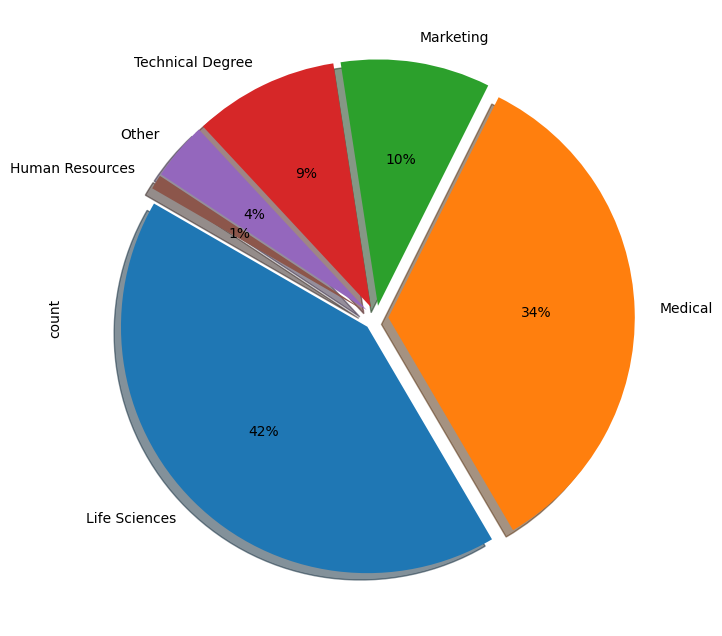

In [26]:
plt.figure(figsize = (12,8))
kpi5.plot(kind = 'pie',
                   autopct = '%1.0f%%',
                   explode = [0.05]*len(kpi5),
                  shadow = True,
                  startangle=150)
plt.show();

In [27]:
#kpi6
kpi6 = df_new.groupby(['Gender','Department','JobRole']).agg({'Age':'mean'}).reset_index()
kpi6.head()

,Gender,Department,JobRole,Age
0,Female,Human Resources,Human Resources,34.438
1,Female,Human Resources,Manager,50.500
2,Female,Research & Development,Healthcare Representative,38.902
3,Female,Research & Development,Laboratory Technician,35.271
4,Female,Research & Development,Manager,47.500


In [28]:
kpi7 = df_new['MaritalStatus'].value_counts()
kpi7

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

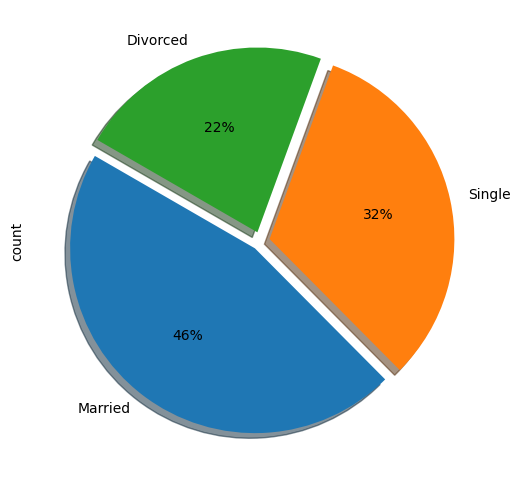

In [29]:
plt.figure(figsize = (10,6))
kpi7.plot(kind = 'pie',
                   autopct = '%1.0f%%',
                   explode = [0.05]*len(kpi7),
                  shadow = True,
                  startangle=150)
plt.show();

In [30]:
kpi8 = df_new['Attrition'].value_counts()
kpi8

Attrition
No     1233
Yes     237
Name: count, dtype: int64

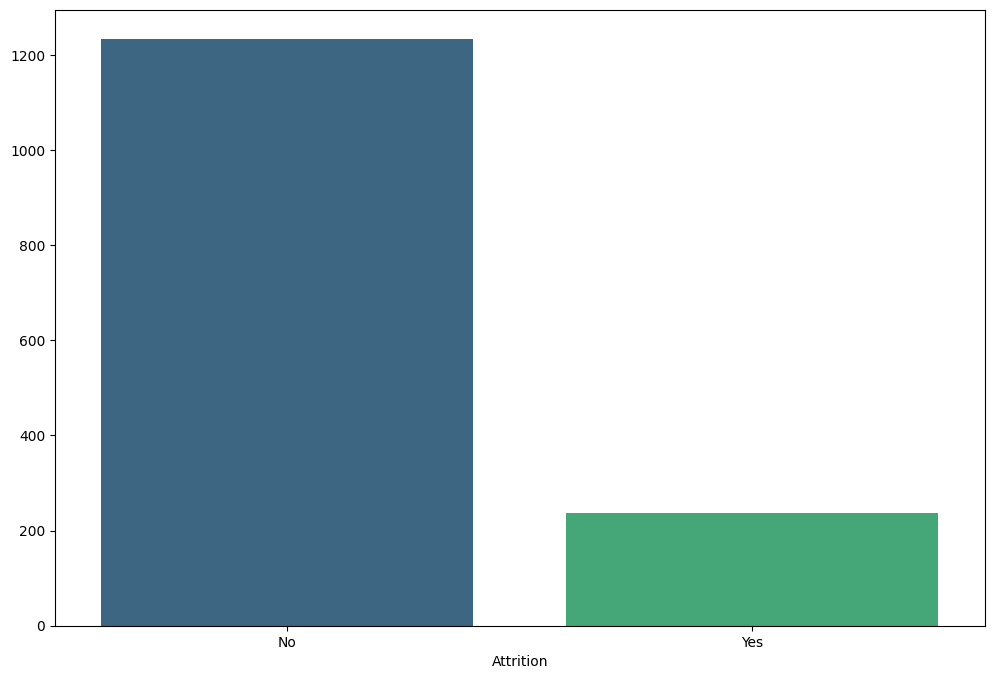

In [31]:
plt.figure(figsize = (12,8))
sns.barplot(x=kpi8.index, y= kpi8.values, palette = 'viridis')
plt.show();

In [32]:
m20=df_new[(df_new['Age']>=20) & (df_new['DailyRate']>=1000)&(df_new['Gender']=='Male')]
m20.head()

,Age,OverTime,MaritalStatus,JobRole,Gender,EducationField,Department,BusinessTravel,Education,DistanceFromHome,DailyRate,Attrition
2,37,Yes,Single,Laboratory Technician,Male,Other,Research & Development,Travel_Rarely,2,2,1373,Yes
5,32,No,Single,Laboratory Technician,Male,Life Sciences,Research & Development,Travel_Frequently,2,2,1005,No
7,30,No,Divorced,Laboratory Technician,Male,Life Sciences,Research & Development,Travel_Rarely,1,24,1358,No
9,36,No,Married,Healthcare Representative,Male,Medical,Research & Development,Travel_Rarely,3,27,1299,No
13,34,No,Divorced,Laboratory Technician,Male,Medical,Research & Development,Travel_Rarely,2,19,1346,No


In [33]:
kpi9 = m20['EducationField'].head(10).value_counts()
kpi9

EducationField
Life Sciences    4
Medical          3
Other            2
Marketing        1
Name: count, dtype: int64

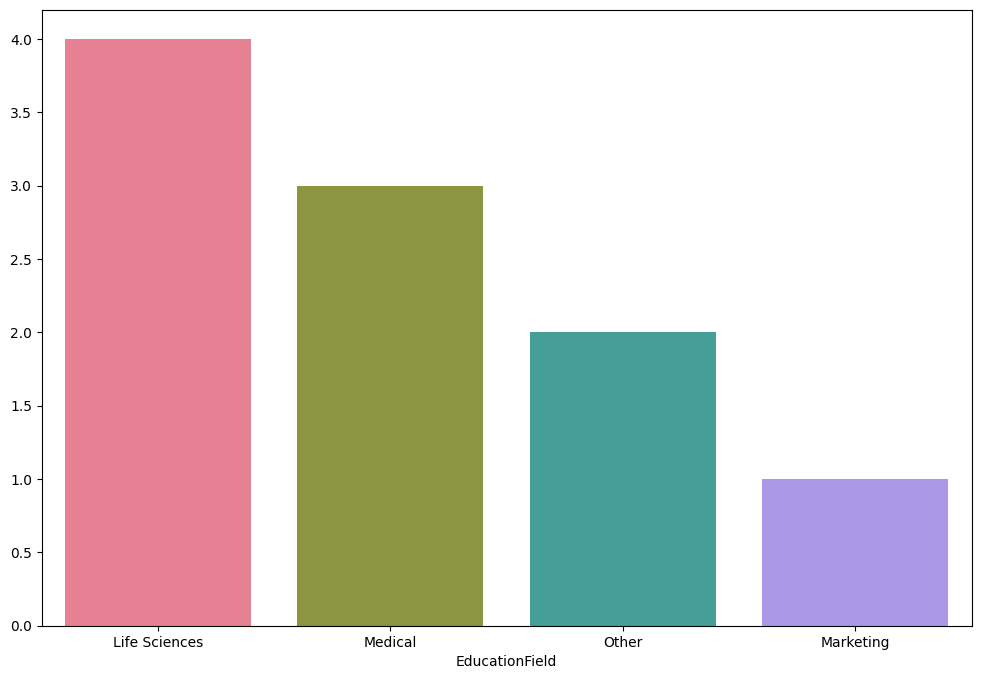

In [34]:
plt.figure(figsize = (12,8))
sns.barplot(x=kpi9.index, y= kpi9.values, palette = 'husl')
plt.show();